In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'songs.csv', 'members.csv', 'train.csv', 'song_extra_info.csv', 'sample_submission.csv']


# Importing Libraries

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc
import matplotlib as mpl

In [3]:
import numpy as np
import pandas as pd 


# Importing Files

In [4]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
songs = pd.read_csv('../input/songs.csv')
members = pd.read_csv('../input/members.csv')
sample = pd.read_csv('../input/sample_submission.csv')

# Exploring Data

In [5]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [7]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [9]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [10]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [11]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [12]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [13]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


# Data Visualization

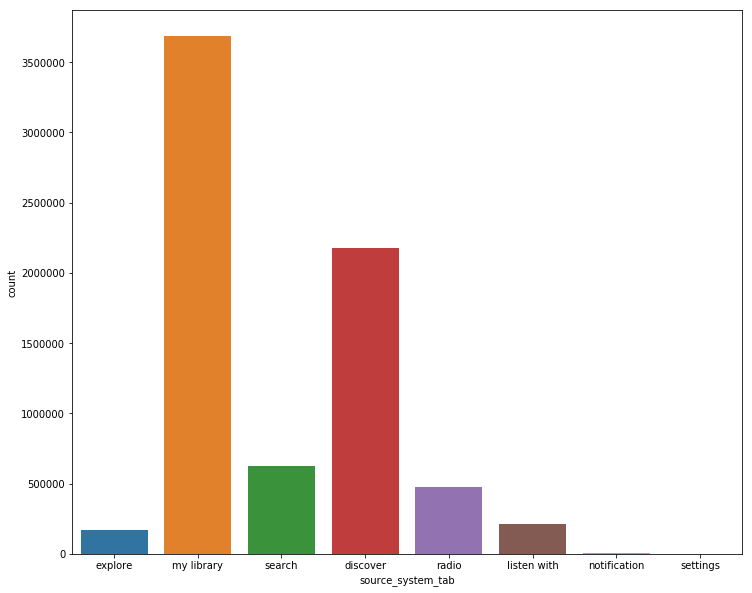

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_system_tab'])

> This tells us that the source system tab used by people in decreasing order my library, discovery,search, radio and explore.

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64


<Figure size 1440x1440 with 0 Axes>

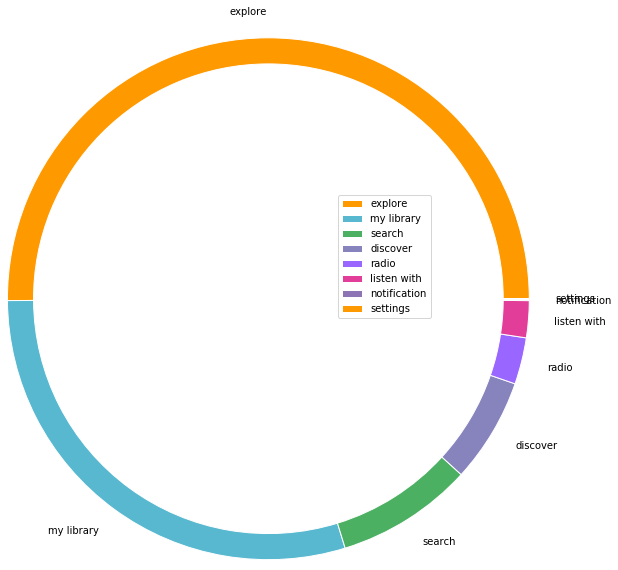

In [15]:
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize = (20, 20)) 
group_names=['explore','my library','search','discover','radio','listen with','notification','settings']
group_size=pd.value_counts(train.source_system_tab)
print(group_size)
a, b, c,d,e,f,g,h=[plt.cm.autumn, plt.cm.GnBu, plt.cm.YlGn,plt.cm.Purples,plt.cm.cool,plt.cm.RdPu,plt.cm.BuPu,plt.cm.bone]
fig, ax = plt.subplots()
ax.axis('equal')
mypie, texts= ax.pie(group_size, radius=3.0,labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6), e(0.6), f(0.6),g(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')  
plt.legend() 
plt.show()


In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_screen_name'])
plt.xticks(rotation='90')

> Source Screen Name
> Decreasing order - Local Playlist, Online Playlist, Radio, Album more, Search, Artist more, Diiscover Chart, Others Profile More, Discover Genre, My Library, Explore

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_type'])
plt.xticks(rotation='90')

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(train['target'])

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_system_tab'],hue=train['target'])

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_screen_name'],hue=train['target'])
plt.xticks(rotation='90')

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_type'],hue=train['target'])
plt.xticks(rotation='90')

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(members['city'])

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(members['registered_via'])

In [ ]:
labels = ['Male','Female']
mpl.rcParams['font.size'] = 20.0
sizes = pd.value_counts(members.gender)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal') 
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(members['bd'])
# plt.xlim([1,100])
# plt.ylim([0,2500])
# plt.xticks(rotation = '90')

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(members.query("bd == 0")['bd'],hue = members['gender'] )

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(members.query("bd == 0")['bd'],hue = members['city'] )

In [ ]:
len(members.query("bd==0 and city == 1"))

In [ ]:
len(members.query("city == 1"))

> ***This tells us that most of the members of city 1 don't tell their ages.***

# Merging Files and Exploring the Merged File

In [ ]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_members.head()

Here if we apply any other join then there might be a possibility of having a msno in members but not having that msno in train and thus we will not have any data regarding target of that msno. So, we will not be able to train that data. Similarly there might be a case when a msno is available in train but not in members due to which we will have no information regarding 

In [ ]:
train_merged = pd.merge(train_members, songs, on='song_id', how='left')
train_merged.head()

In [ ]:
train_merged.info()

In [ ]:
test_members = pd.merge(test, members, on='msno', how='inner')
test_merged = pd.merge(test_members, songs, on='song_id', how='left')
test_merged.head()

In [ ]:
test_merged.info()

In [ ]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

# Data Cleaning

In [ ]:
def check_missing_values(df):
    print (df.isnull().values.any())
    if (df.isnull().values.any() == True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
    for col in columns_with_Nan:
        print("%s : %d" % (col, df[col].isnull().sum()))
    
check_missing_values(train_merged)
check_missing_values(test_merged)

In [ ]:
msno.heatmap(train_merged)

In [ ]:
def replace_Nan_non_object(df):
    object_cols = list(df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(np.int(-5))
       
replace_Nan_non_object(train_merged) 
replace_Nan_non_object(test_merged)  

In [ ]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(train_merged)
change_datatype(test_merged)

In [ ]:
corr_matrix = train_merged.corr()
print(corr_matrix)
corr_matrix.head()

In [ ]:
len(train_merged.query("bd< 0"))

In [ ]:
train_merged = train_merged.query("bd>=0")

In [ ]:
len(train_merged.query("bd== 0"))

In [ ]:
len(train_merged.query("bd>90"))

In [ ]:
len(train_merged.query("bd>0 and bd<5"))

In [ ]:
train_merged_temp = train_merged.query("bd >=5 and bd<=90")
len(train_merged_temp)

In [ ]:
train_merged_temp["bd"].describe()

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['bd'])

Mode = 25


Mode<Median<Mean  Positively Skewed Distribution


We should make bins.

In [ ]:
train_merged_temp['age_range'] = pd.cut(train_merged_temp['bd'],bins=[5,10,18,30,45,60,80,90])

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['age_range'],hue=train_merged_temp['target'])

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['age_range'],hue=train_merged_temp['source_system_tab'])

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['age_range'],hue=train_merged_temp['source_screen_name'])

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['age_range'],hue=train_merged_temp['source_type'])

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['age_range'],hue=train_merged_temp['city'])

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['age_range'],hue=train_merged_temp['gender'])

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(train_merged_temp['age_range'],hue=train_merged_temp['language'])

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(train_merged_temp['age_range'],train_merged_temp["song_length"]/60000,hue=train_merged_temp['target'],)
plt.ylabel("Song Length in Minutes")
plt.xlabel("Age Groups")
plt.ylim([0,6])

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(train_merged_temp['age_range'],train_merged_temp["registration_init_time"]/10000,hue=train_merged_temp['target'],)
plt.ylabel("Registration Year")
plt.xlabel("Age Groups")

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(train_merged_temp['age_range'],train_merged_temp["expiration_date"]/10000,hue=train_merged_temp['target'],)
plt.ylabel("Expiration Year")
plt.xlabel("Age Groups")

In [ ]:
train_merged = train_merged.query("bd<=90")

Assigning value median(27) to value with age '0'. Had to do because no relation was found between age and other attributes.

In [ ]:
for i in train_merged.query("bd == 0"):
    train_merged["bd"] = 27

# Data Visualization for Merged Data

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train_merged['source_system_tab'],hue=train_merged['gender'])
plt.xticks(rotation='90')

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train_merged['source_screen_name'],hue=train_merged['gender'])
plt.xticks(rotation='90')

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train_merged['source_type'],hue=train_merged['gender'])
plt.xticks(rotation='90')

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train_merged['city'],hue=train_merged['gender'])
plt.xticks(rotation='90')